# Live Visual

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

## 2D Live Visual

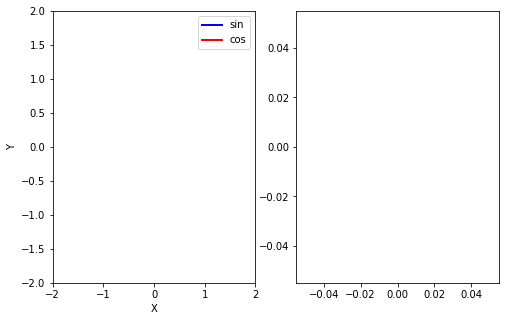

In [2]:
# create a figure and axes
fig = plt.figure(figsize=(8,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set(xlim=(0, 2), ylim=(-2, 2), xlabel='Time', ylabel='Magnitude')
ax1.set(xlim=(-2, 2), ylim=(-2, 2), xlabel='X', ylabel='Y', title='Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);

In [3]:
# animation function. This is called sequentially
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

In [4]:
from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

In [5]:
from IPython.display import HTML
HTML(anim.to_html5_video())

In [6]:
from matplotlib import rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

In [7]:
anim

## 3D Live Visual

In [8]:
from mpl_toolkits import mplot3d

%matplotlib inline

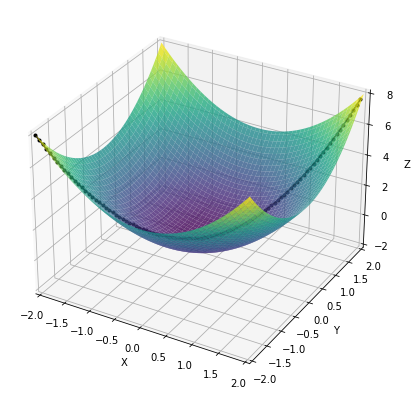

In [18]:
# Attaching 3D axis to the figure
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection="3d")

# Setting the axes properties
ax.set(xlim3d=(-2, 2), xlabel='X')
ax.set(ylim3d=(-2, 2), ylabel='Y')
ax.set(zlim3d=(-2, 8), zlabel='Z')

x,y = np.meshgrid(np.linspace(-2,2,100),np.linspace(-2,2,100))
z = np.square(x) + np.square(y)

ax.plot_surface(x,y,z, cmap='viridis', alpha=0.8)

x, y = np.linspace(-2,2,100), np.linspace(-2,2,100) 
z = x ** 2 + y ** 2

line, = ax.plot([], [], [], color='black', marker='.')

def update_lines(n):
    line.set_data_3d(x[:n], y[:n], z[:n])
    return (line,)
# Creating the Animation object
anim = animation.FuncAnimation(fig, update_lines, interval=100)

HTML(anim.to_html5_video())